**Overview**
* This is a quick data cleaning/analysis I did for class
* Cleaned and (roughly) analyzed event attendance at my university's business school
* This notebook is part of a larger project in which we made used our data analysis to make attendance tracking and retention recommendations
* We also built a Shiny Dashboard
* Those two items are not included for privacy reasons, as they contain PII

## 1. Importing Packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Data

The attendance logs for each event were in their own individual csv files. I first read in each csv to a DataFrame exclusive to their event type. Then, I compiled them into a master DataFrame

In [46]:
#reading in the coffee conversations
Coffee_Conversations = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Coffee_Conversations_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Coffee Conversations'
    temp_df['Session Number']=i+1
    Coffee_Conversations=Coffee_Conversations.append(temp_df)

In [47]:
#reading in the health and wellness chats
Health_and_Wellness = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Health_and_Wellness_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Health and Wellness'
    temp_df['Session Number']=i+1
    Health_and_Wellness=Health_and_Wellness.append(temp_df)

In [48]:
#reading in the info sessions
Info_Sessions = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Info_Sessions_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Info Sessions'
    temp_df['Session Number']=i+1
    Info_Sessions=Info_Sessions.append(temp_df)

In [49]:
#reading in the student alumni workshops
Student_Alumni_Workshops = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Student_Alumni_Workshops_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Student Alumni Workshops'
    temp_df['Session Number']=i+1
    Student_Alumni_Workshops=Student_Alumni_Workshops.append(temp_df)

In [50]:
#reading in the Terry Majors Fairs
Terry_Major_Fairs = pd.DataFrame()
for i in range(5):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Terry_Majors_Fair_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Terry Major Fairs'
    temp_df['Session Number']=i+1
    Terry_Major_Fairs=Terry_Major_Fairs.append(temp_df)

In [51]:
#reading in the Terry Talks
Terry_Talks = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/Terry_Talks_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Terry Talks'
    temp_df['Session Number']=i+1
    Terry_Talks=Terry_Talks.append(temp_df)

In [52]:
#reading in the Terry_Womens_Initiatives
Terry_Womens_Initiatives = pd.DataFrame()
for i in range(100):
    temp_df=pd.read_excel(r'/Users/josephwargo/Downloads/USS_Mock_Survey_Results/TWI_'+str(i+1)+'.xlsx')
    temp_df['Session Type']='Terry Womens Initiatives'
    temp_df['Session Number']=i+1
    Terry_Womens_Initiatives=Terry_Womens_Initiatives.append(temp_df)

In [53]:
#dropping superfluous rows
Coffee_Conversations.drop(columns=['Dietary Restrictions','Question for Panelist'], inplace=True)
Health_and_Wellness.drop(columns=['Terry Affiliation','If you are in Mark 3000/3001, what time slot?','Initals for Consent'], inplace=True)
Info_Sessions.drop(columns=['Can we share your contact info with the Employer','Signature','Other Major'], inplace=True)
Student_Alumni_Workshops.drop(columns=['Dietary Restrictions','Question for Panelist'], inplace=True)
Terry_Major_Fairs.drop(columns=['Dietary Restrictions'], inplace=True)
Terry_Talks.drop(columns=['Dietary Restrictions', 'Question for Panelist'], inplace=True)
Terry_Womens_Initiatives.drop(columns=['Dietary Restrictions', 'Question for Panelist'], inplace=True)

In [54]:
#normalizing column names
Health_and_Wellness.rename(columns={'Major':'Terry Major'},inplace=True)
Info_Sessions.rename(columns={'Graduation Term/Year':'Graduation Year'},inplace=True)
Terry_Major_Fairs['Terry Major']=pd.NA

In [55]:
#reordering columns
cols=Coffee_Conversations.columns.tolist()
Terry_Major_Fairs=Terry_Major_Fairs[cols]

In [56]:
#ensuring the column names are consistent
print('Coffee Conversations: ' + str(list(Coffee_Conversations.columns)))
print('Health and Wellness: ' + str(list(Health_and_Wellness.columns)))
print('Info Sessions: ' + str(list(Info_Sessions.columns)))
print('Student Alumni Workshops: ' + str(list(Student_Alumni_Workshops.columns)))
print('Terry Major Fairs: ' + str(list(Terry_Major_Fairs.columns)))
print('Terry Talks: ' + str(list(Terry_Talks.columns)))
print('Terry Womens Initiatives: ' + str(list(Terry_Womens_Initiatives.columns)))

Coffee Conversations: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Health and Wellness: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Info Sessions: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Student Alumni Workshops: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Terry Major Fairs: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Terry Talks: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']
Terry Womens Initiatives: ['ID Number', 'First', 'Last', 'Email', 'Terry Major', 'Graduation Year', 'Session Type', 'Session Number']


In [57]:
#merging smaller dataframes into one larger dataframe
Terry_Events=pd.concat([Coffee_Conversations, Health_and_Wellness, Info_Sessions, Student_Alumni_Workshops, Terry_Major_Fairs,
                        Terry_Talks, Terry_Womens_Initiatives], ignore_index=True)

In [58]:
#changing ID Number to type int
Terry_Events['ID Number']=Terry_Events['ID Number'].apply(int)

In [59]:
#making Graduation Year consistent
to_replace=['M','a','y','J','u','n','e','D','c','m','b','r','j',' ']
Terry_Events['Graduation Year'] = Terry_Events['Graduation Year'].astype(str)
for char in to_replace:
    Terry_Events['Graduation Year'] = Terry_Events['Graduation Year'].apply(lambda x: x.replace(char, ''))
Terry_Events['Graduation Year']=pd.to_numeric(Terry_Events['Graduation Year'], errors='coerce')
Terry_Events['Graduation Year']=Terry_Events['Graduation Year'].astype('Int64')

In [60]:
#checking my work
Terry_Events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19139 entries, 0 to 19138
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID Number        19139 non-null  int64 
 1   First            19139 non-null  object
 2   Last             19139 non-null  object
 3   Email            19139 non-null  object
 4   Terry Major      16879 non-null  object
 5   Graduation Year  18420 non-null  Int64 
 6   Session Type     19139 non-null  object
 7   Session Number   19139 non-null  int64 
dtypes: Int64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [61]:
#exporting to csv
Terry_Events.to_csv('/Users/josephwargo/Desktop/UGA Final Year/Spring/MIST5730/Final Project/Final Shiny Project/Data/All_Attendance.csv',index=None)

I initially did this part in two different notebooks, hence the exporting and re-importing

In [62]:
#importing csv
All_Attendance = pd.read_csv('/Users/josephwargo/Desktop/UGA Final Year/Spring/MIST5730/Final Project/Final Shiny Project/Data/All_Attendance.csv')

In [63]:
#fixing datatypes
All_Attendance['Graduation Year']=All_Attendance['Graduation Year'].astype('Int64')
All_Attendance['Graduation Year']=All_Attendance['Graduation Year'].astype('category')

## 3. Exploratory Data Analysis

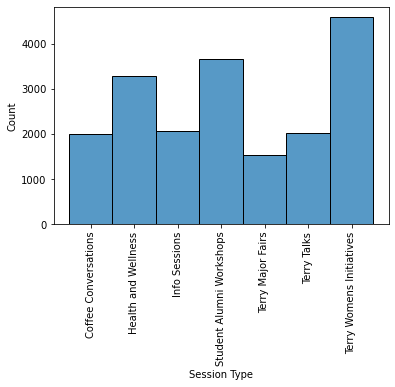

In [64]:
#getting a general idea of total attendance by session type
ax1=sns.histplot(All_Attendance['Session Type'])
plt.xticks(rotation=90)
plt.show()

**Takeaways**
* Certain event types have more total attendance than others, but there aren't many potential takeaways because the number of events varies greatly by event type

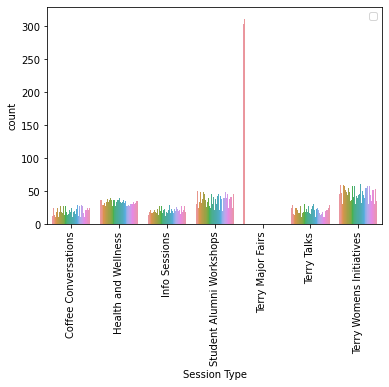

In [65]:
#looking broadly at attendance per individual event, which also gives a rough idea of average event attendance by event type
ax2=sns.countplot(data=All_Attendance, x='Session Type', hue='Session Number')
plt.xticks(rotation=90)
plt.legend([],[])
plt.show()

**Takeaways**
* The major fairs are by far the most attended on average, but there are fewer of them
* Terry Women's initiatives have a high average attendance as well

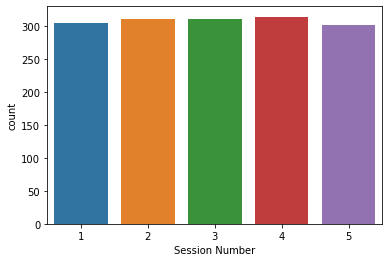

In [66]:
#exploring the attendance for each Major Fair 
Terry_Major_Fairs_Attendance = All_Attendance[All_Attendance['Session Type']=='Terry Major Fairs']
ax3=sns.countplot(data=Terry_Major_Fairs_Attendance, x='Session Number')
plt.show()

**Takeaways**
* High attendance at each event
* Total attendance is consistent

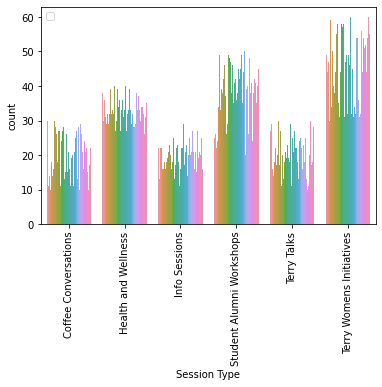

In [67]:
#exploring individual event attendance without the major fairs to skew things
Terry_Exclusive_Attendance = All_Attendance[All_Attendance['Session Type']!='Terry Major Fairs']
ax3=sns.countplot(data=Terry_Exclusive_Attendance, x='Session Type', hue='Session Number')
plt.xticks(rotation=90)
plt.legend([],[])
plt.show()

**Takeaways**
* Coffee Chats, Info Sessions, and Terry Talks are less popular on average

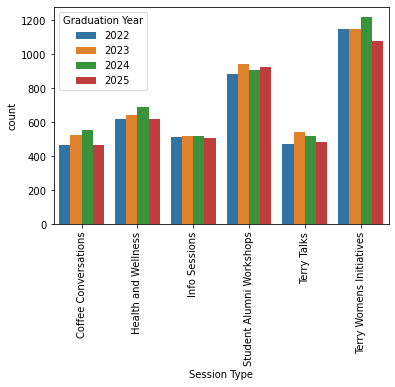

In [68]:
#looking by graduation year
ax4=sns.countplot(data=Terry_Exclusive_Attendance, x='Session Type', hue='Graduation Year')
plt.xticks(rotation=90)
plt.show()

**Takeaways**
* It looks like class of 2024 has the most attendance, but barely
* This could be because that class is applying to majors

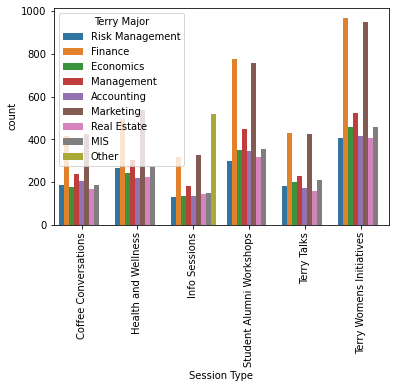

In [69]:
#looking by major
x5=sns.countplot(data=Terry_Exclusive_Attendance, x='Session Type', hue='Terry Major')
plt.xticks(rotation=90)
plt.show()

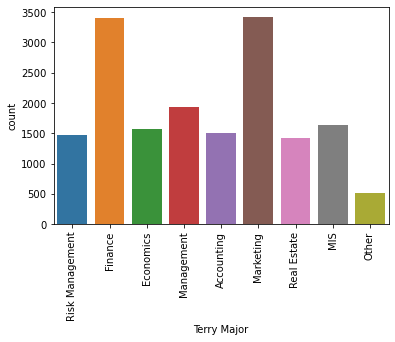

In [70]:
#total attendance by major
ax6=sns.countplot(data=Terry_Exclusive_Attendance, x='Terry Major')
plt.xticks(rotation=90)
plt.show()

**Takeaways**
* Finance and Marketing majors attend the most
* This may be skewed because they are the most popular majors

In [71]:
#calculating the number of visits to event per students enrolled in each major (rough estimate)
#numbers found online, not in CSV format
risk_mgmt_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Risk Management'])/548
finance_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Finance'])/1320
econ_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Economics'])/726
mgmt_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Management'])/536
acct_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Accounting'])/455
market_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='Marketing'])/643
#Real Estate attendance is unknown
mis_attendance=len(Terry_Exclusive_Attendance[Terry_Exclusive_Attendance['Terry Major']=='MIS'])/855

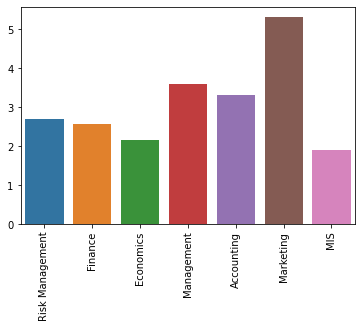

In [72]:
#plotting the above data
ax7=sns.barplot(x=['Risk Management','Finance','Economics','Management','Accounting','Marketing','MIS'],
            y=[risk_mgmt_attendance,finance_attendance,econ_attendance,mgmt_attendance,acct_attendance,market_attendance,mis_attendance])
plt.xticks(rotation=90)
plt.show()

**Takeaways**
* Although there are a lot of Marketing majors, they show up to events at higher rates
* MIS majors do not attend many events

In [73]:
#creating some pivot tables for greater takeaways
Event_Log=pd.pivot_table(data=All_Attendance,
                        index=['Session Type', 'Session Number', 'Terry Major', 'Graduation Year'],
                        values=['Last'], aggfunc=['count'], fill_value=0)
Event_Log.rename(columns={'Last':'Count', 'count':''},inplace=True)
Event_Log.sort_values(by=['Session Type', 'Session Number'], inplace=True)

Event_Type_Log=pd.pivot_table(data=All_Attendance,
                        index=['Session Type', 'Terry Major', 'Graduation Year'],
                        values=['Last'], aggfunc=['count'], fill_value=0)
Event_Type_Log.rename(columns={'Last':'Count', 'count':''},inplace=True)

In [74]:
#breaking down event attendance by major and grad year for each individual session
Event_Log

Count
Session Type             Session Number Terry Major     Graduation Year      
Coffee Conversations     1              Accounting      2022                1
                                                        2023                1
                                                        2024                2
                                                        2025                0
                                        Economics       2022                0
...                                                                       ...
Terry Womens Initiatives 100            Real Estate     2025                0
                                        Risk Management 2022                0
                                                        2023                0
                                                        2024                1
                                                        2025                0

[25200 rows x 1 columns]

In [75]:
#breaking down event attendance by major and grad year for each type of session
Event_Type_Log

Count
Session Type             Terry Major     Graduation Year      
Coffee Conversations     Accounting      2022               68
                                         2023               54
                                         2024               46
                                         2025               40
                         Economics       2022               28
...                                                        ...
Terry Womens Initiatives Real Estate     2025              105
                         Risk Management 2022               98
                                         2023              105
                                         2024              106
                                         2025               98

[252 rows x 1 columns]